# Comparison of Adjacent TMA sections

**Question:** How does the signal-to-background ratio and staining specificity compare across experimental replicates?

**Samples:** 
- TMA: Purchased from biomax: https://www.biomax.us/tissue-arrays/Breast/BR1506
- Adjacent Sections: BM-Her2N75-15, BM-Her2N75-17, BM-Her2N75-18 (section 16 skipped.)
- Scenes: (i.e. TMA cores) 
  - 17: ER+/HER2+, immune rich. 
  - 49: ER+/HER2+
  - 59: HER2+ immune rich

**Method**: For each stain, pixel intensity was manually thresholded to separate the positive pixels from the negative. Visualizations produced include:
1. Autoscaled overview of stain, with dynamic range of 0 - 99th percentile displayed in legend.
2. Mask of positive pixels, so that masks from adjacent section stains can be compared for specificity.
3. Measure mean intensity in mask area and background, and output values to .csv for downstream analysis.

In [1]:
#libraries 
import os
import pandas as pd
import numpy as np
from mplex_image import preprocess, process, analyze, mpimage, cmif
import shutil
import skimage
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
#paths
codedir = '/home/groups/graylab_share/OMERO.rdsStore/engje/Data/cycIF_ValidationStudies/cycIF_Validation'

In [3]:
%matplotlib inline

In [9]:
#Reproducibility 
#analyze full TMA core

d_crop ={
    'BM-Her2N75-15-Scene-017':(1160,500,4000,4000),
    'BM-Her2N75-17-Scene-017':(1107,1095,4000,4000),
    'BM-Her2N75-18-Scene-017':(2189,2082,4000,4000),

    'BM-Her2N75-15-Scene-049':(2066,879,4000,4000),
    'BM-Her2N75-17-Scene-049':(2009,1397,4000,4000),
    'BM-Her2N75-18-Scene-049':(1148,699,4000,4000),

    'BM-Her2N75-15-Scene-059':(460,950,4000,4000),
    'BM-Her2N75-17-Scene-059':(449,1353,4000,4000),
    'BM-Her2N75-18-Scene-059':(1400,700,4000,4000),

  }

CD20  9
mean positive intensity = 9697.452412941646
mean negative intensity = 2626.966482085836
mean positive intensity = 10426.235365967876
mean negative intensity = 2444.0649428586635
mean positive intensity = 10398.159538567494
mean negative intensity = 2529.177306757584
mean positive intensity = 9583.578232783566
mean negative intensity = 2500.507286882931
mean positive intensity = 9350.42728472283
mean negative intensity = 2577.3652021233406
mean positive intensity = 9034.997787701124
mean negative intensity = 2706.4801199710196
mean positive intensity = 8643.287886280657
mean negative intensity = 2339.632277245863
mean positive intensity = 8654.924495303214
mean negative intensity = 2413.650844985118
mean positive intensity = 8761.312861384591
mean negative intensity = 2547.2804618807077
CD4  9
mean positive intensity = 4122.089398564778
mean negative intensity = 1546.5491558510448
mean positive intensity = 4443.527086408548
mean negative intensity = 1293.1037849790118
mean posit

/home/exacloud/tempwork/Chin_Lab/bin/miniconda3/lib/python3.7/site-packages/mplex_image/mpimage.py:330: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(tu_array[0],tu_array[1],figsize=tu_fig)


mean positive intensity = 8887.138958767524
mean negative intensity = 1920.987801061845
mean positive intensity = 8988.568440440136
mean negative intensity = 1962.2858699878627
mean positive intensity = 9310.832611907563
mean negative intensity = 1758.9361107033874
mean positive intensity = 6408.55037930166
mean negative intensity = 1678.8507710336974
mean positive intensity = 6361.436495934135
mean negative intensity = 1723.2054532864256
mean positive intensity = 6782.2178779396
mean negative intensity = 1556.7682124448768
mean positive intensity = 5268.142751529001
mean negative intensity = 1544.9019572467073
mean positive intensity = 6188.448345035105
mean negative intensity = 1550.7733116699324
mean positive intensity = 5283.246364092277
mean negative intensity = 1405.6588029029467


/home/exacloud/tempwork/Chin_Lab/bin/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Ecad  9
mean positive intensity = 3903.0072019415084
mean negative intensity = 1031.0354931363345
mean positive intensity = 4730.52567184176
mean negative intensity = 1304.2981397664707
mean positive intensity = 4067.3211968297956
mean negative intensity = 1476.1110571259621
mean positive intensity = 3463.7539967332423
mean negative intensity = 1013.0090100591361
mean positive intensity = 4098.24298635023
mean negative intensity = 1293.894539293871
mean positive intensity = 4843.482003650628
mean negative intensity = 1445.4314856168157
mean positive intensity = 5134.963218001052
mean negative intensity = 986.223943683666
mean positive intensity = 6476.196316294642
mean negative intensity = 1255.1157617117522
mean positive intensity = 6975.697214200939
mean negative intensity = 1450.6702334125266
Her2  9
mean positive intensity = 4326.984733246626
mean negative intensity = 1577.4940429542294
mean positive intensity = 5121.529203732656
mean negative intensity = 1817.7938678355308
mean po

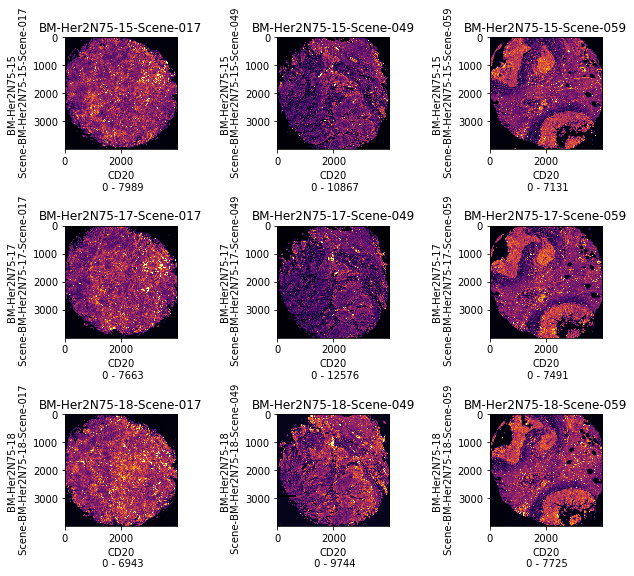

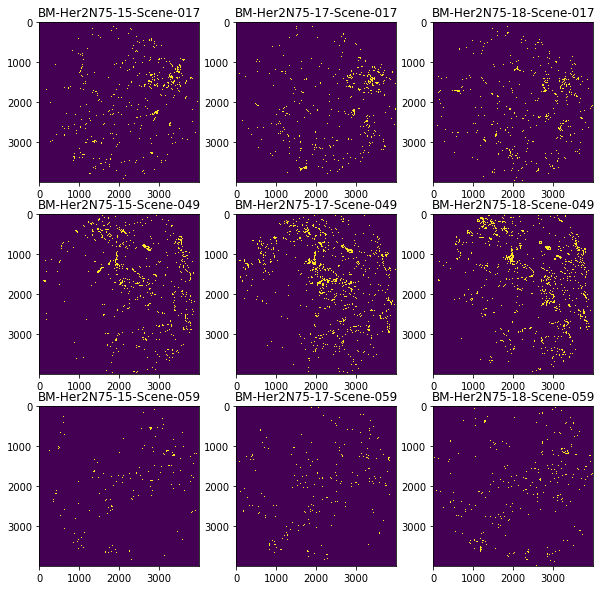

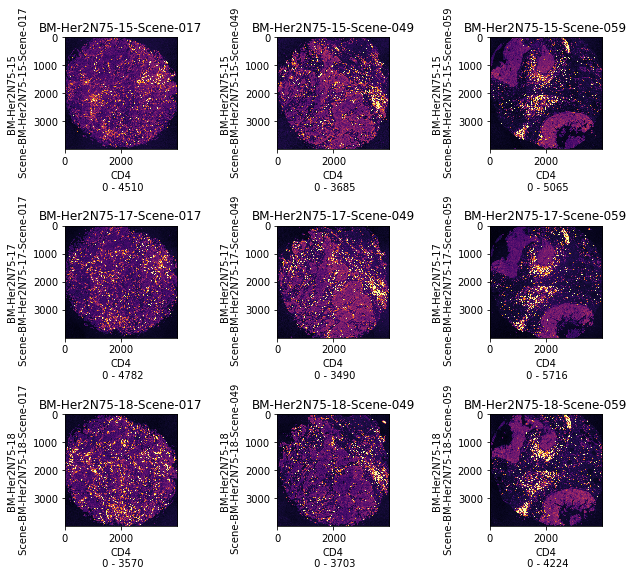

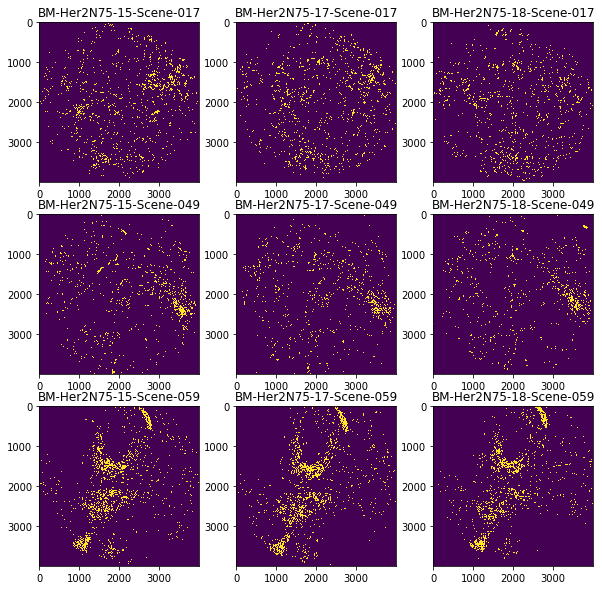

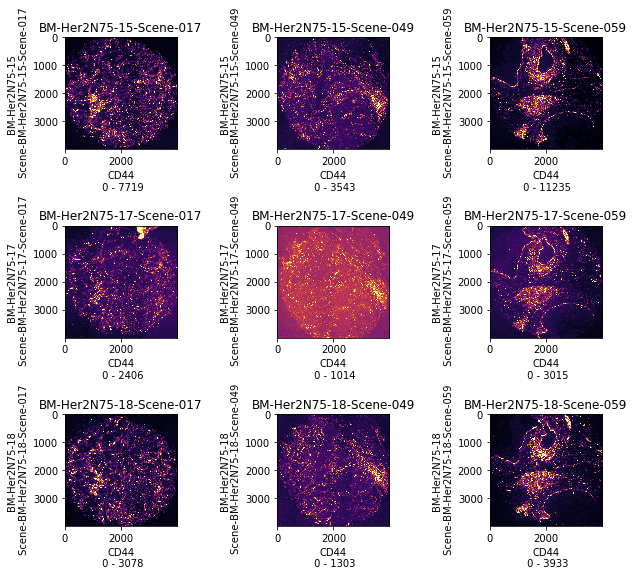

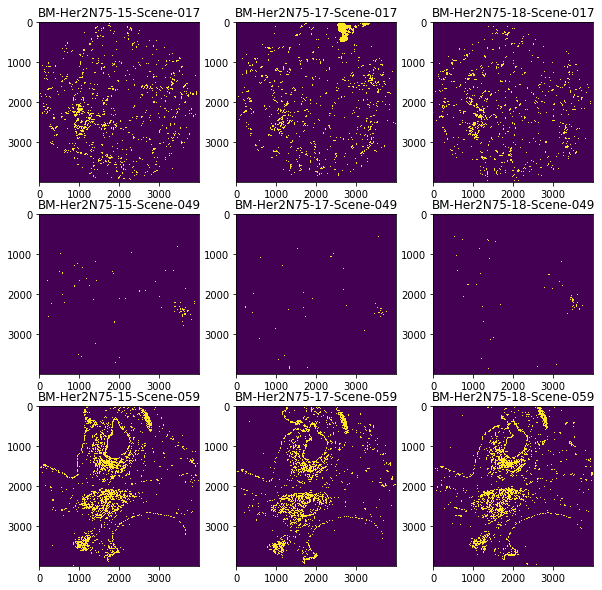

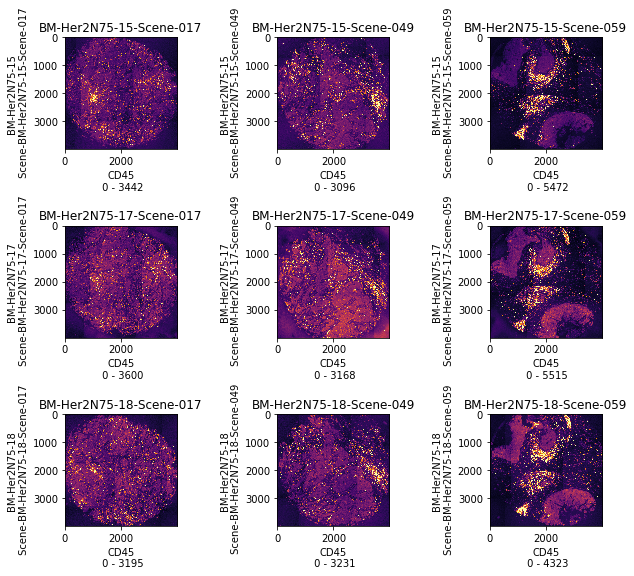

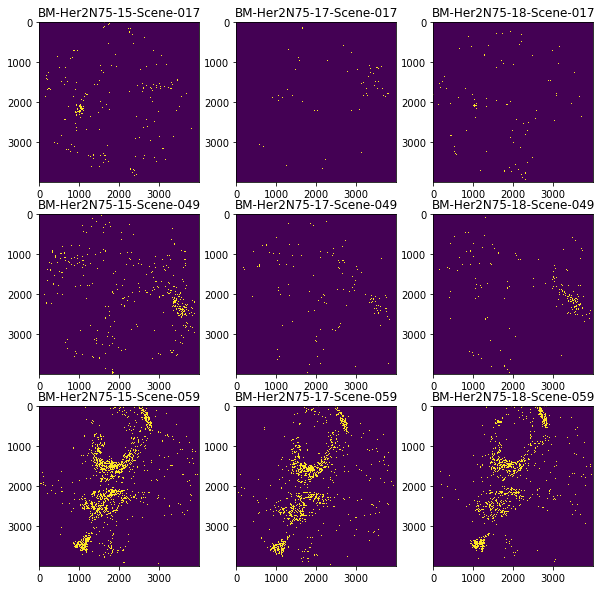

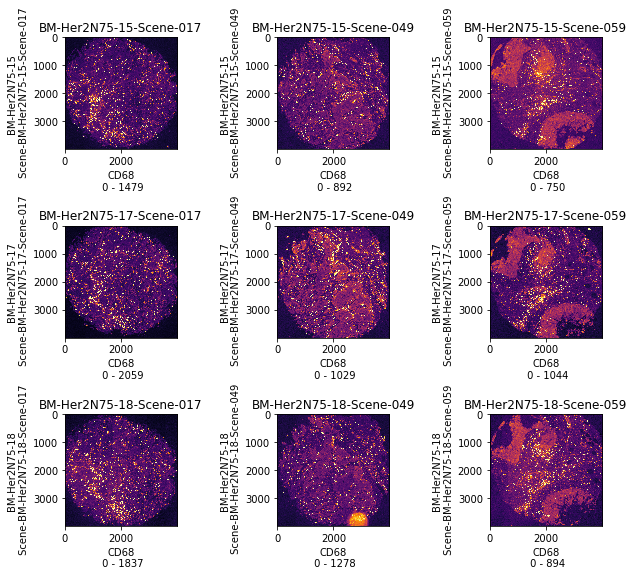

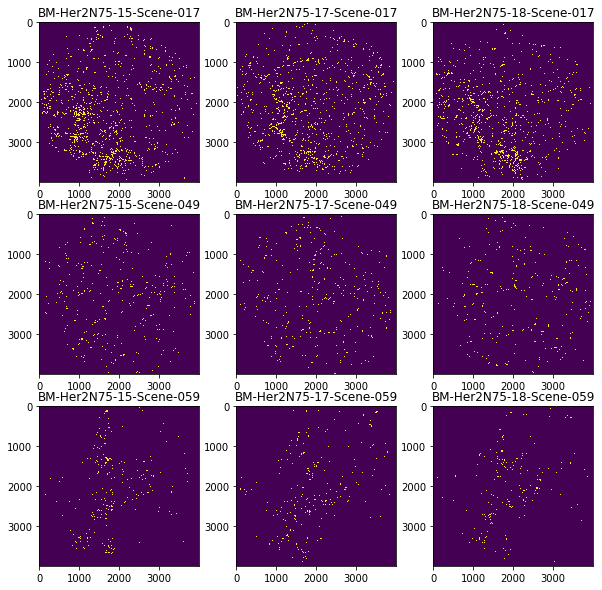

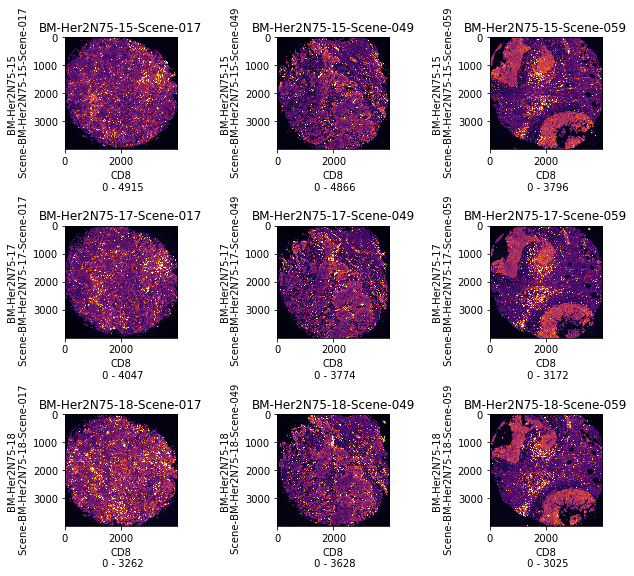

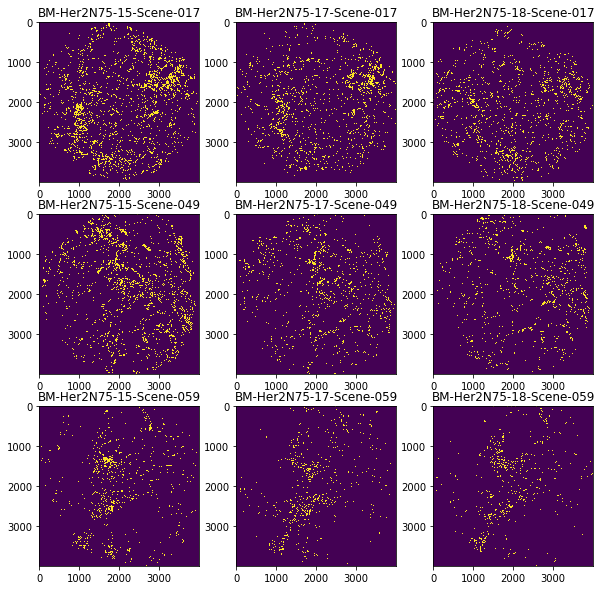

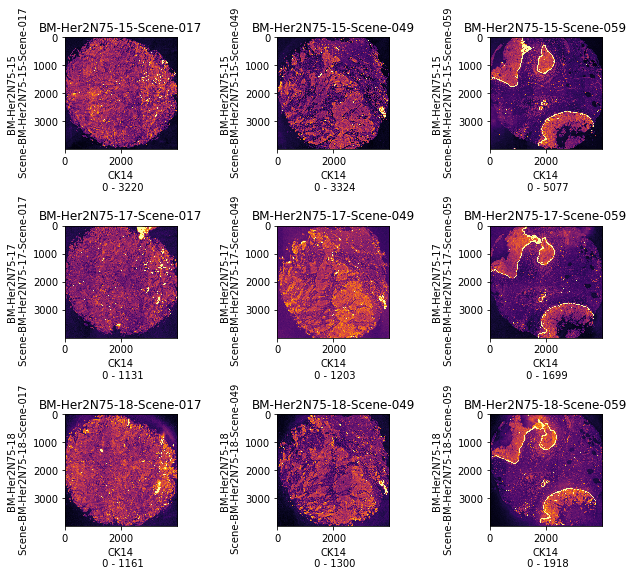

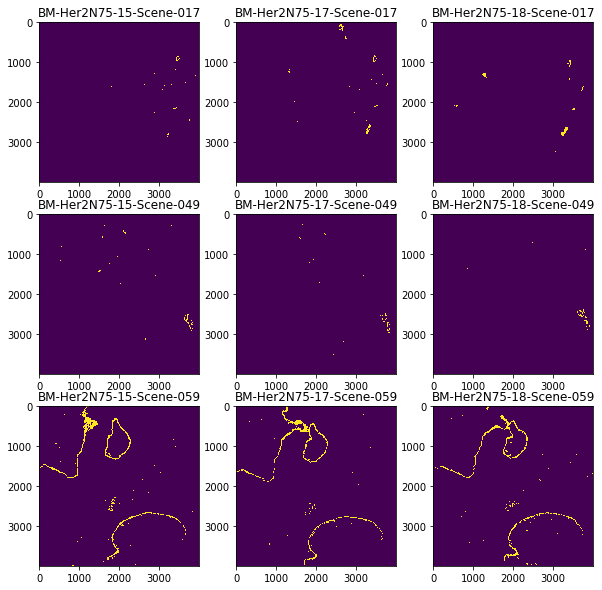

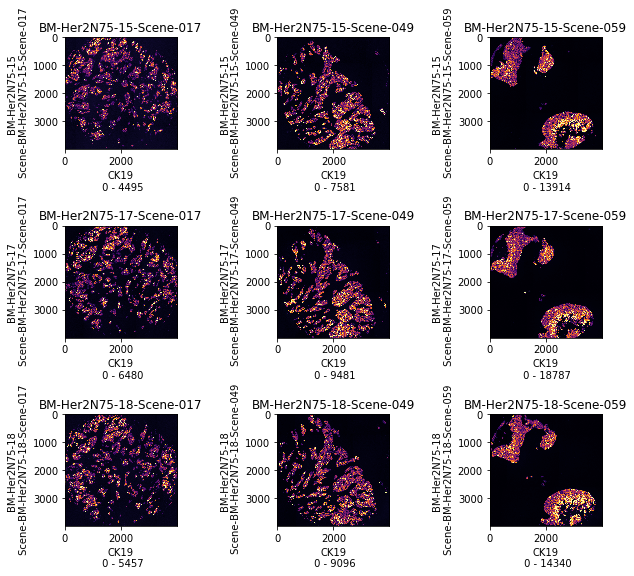

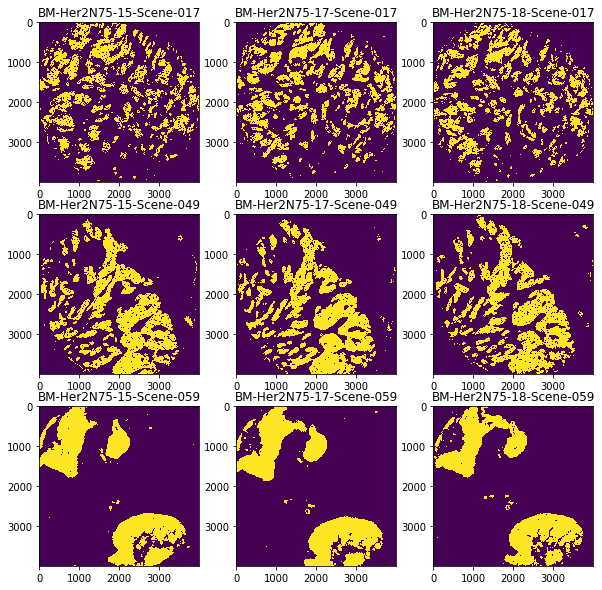

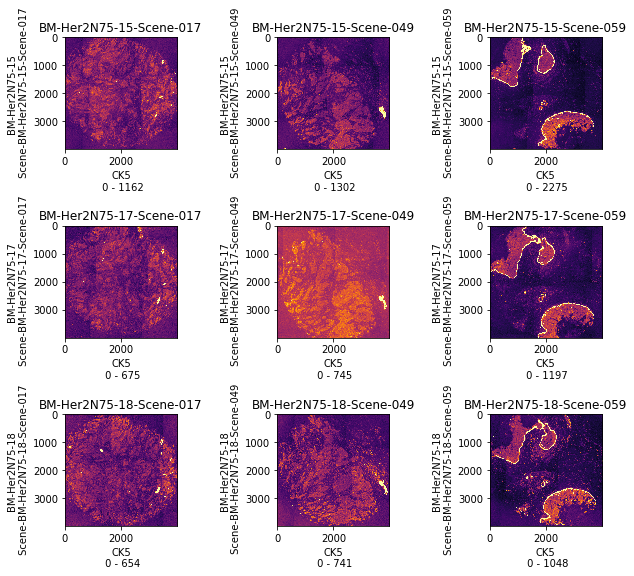

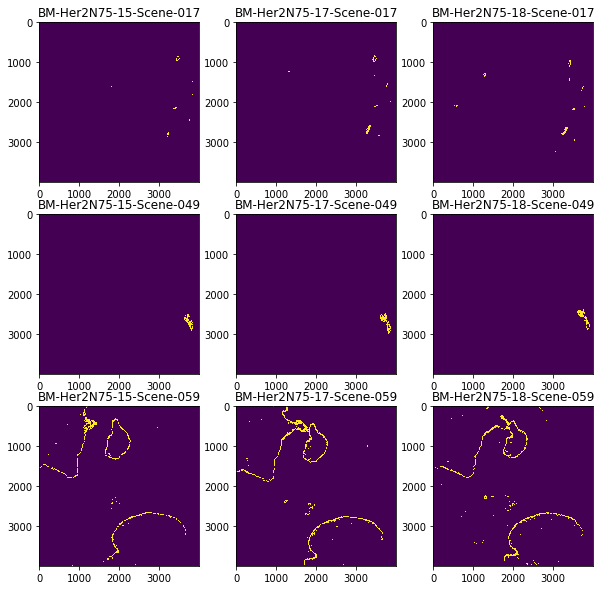

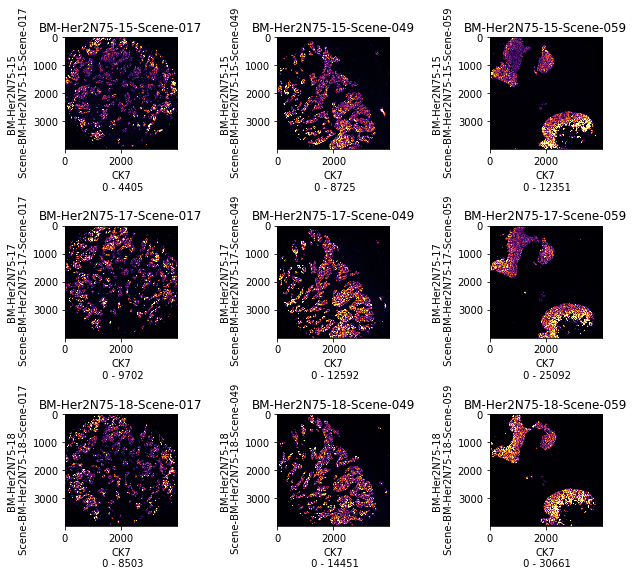

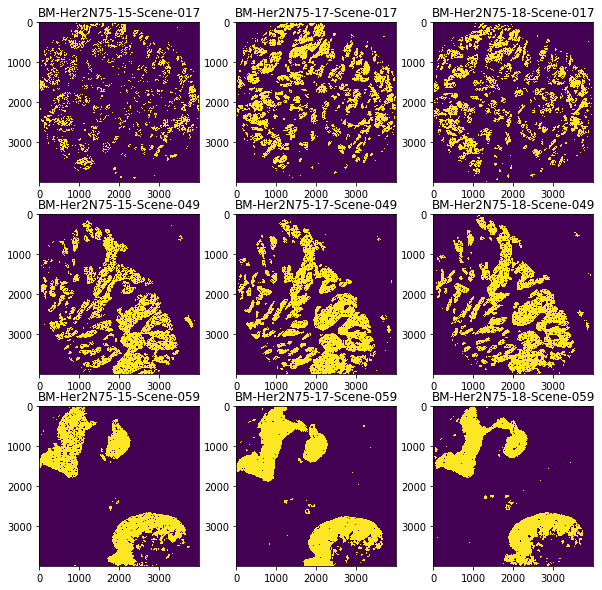

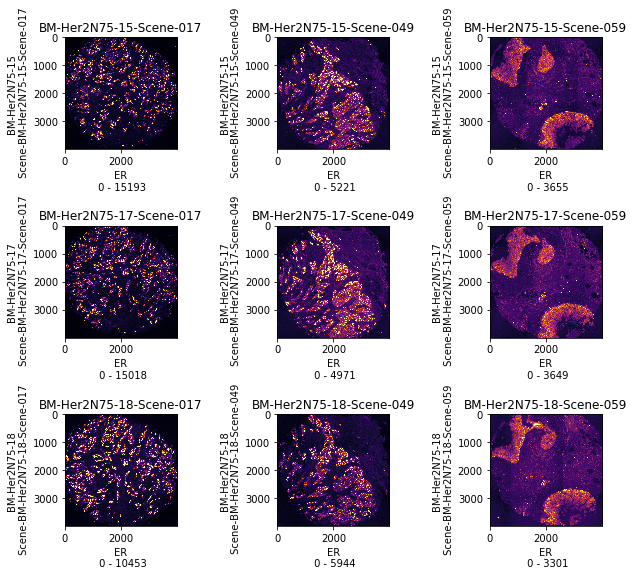

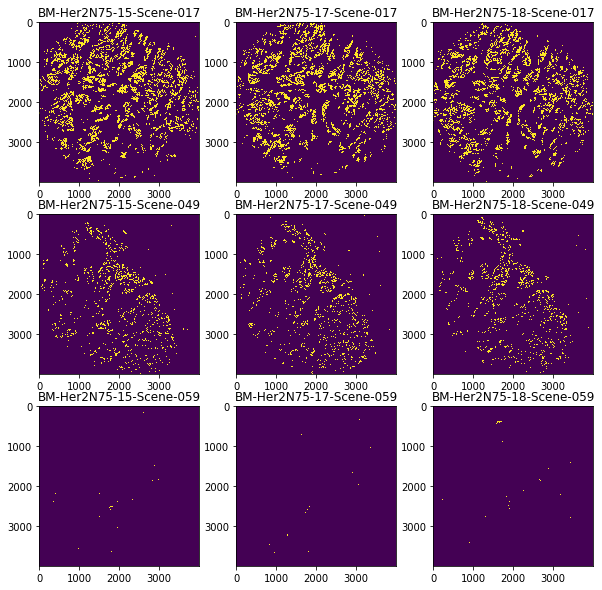

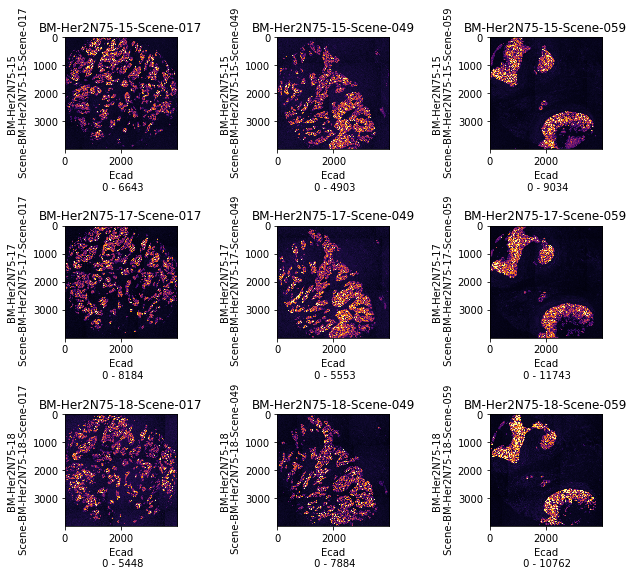

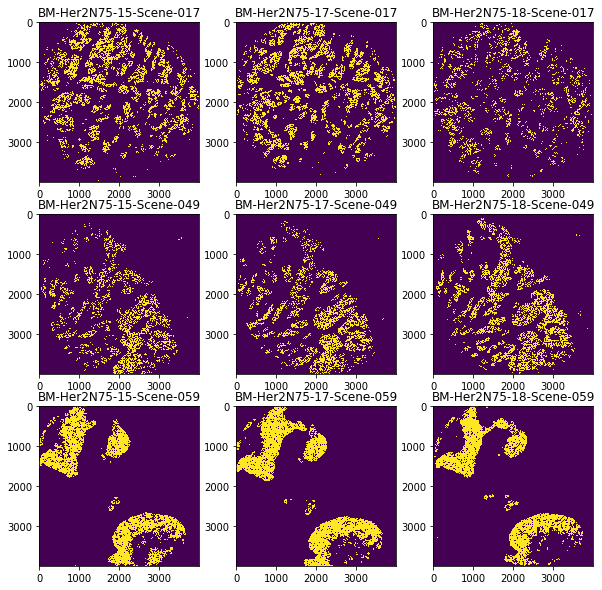

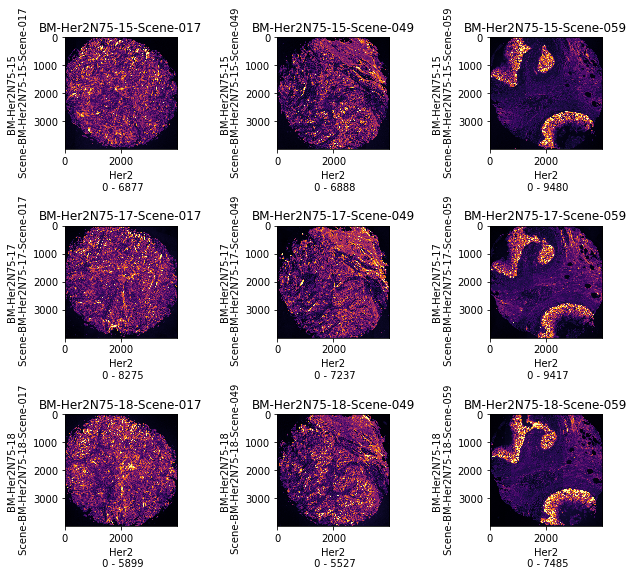

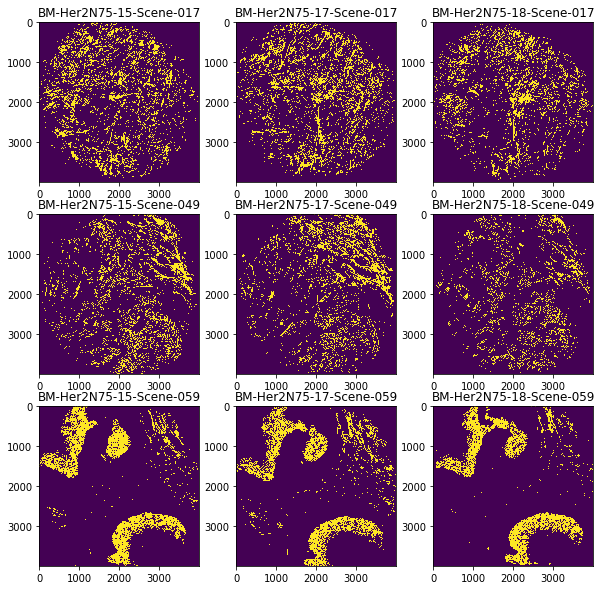

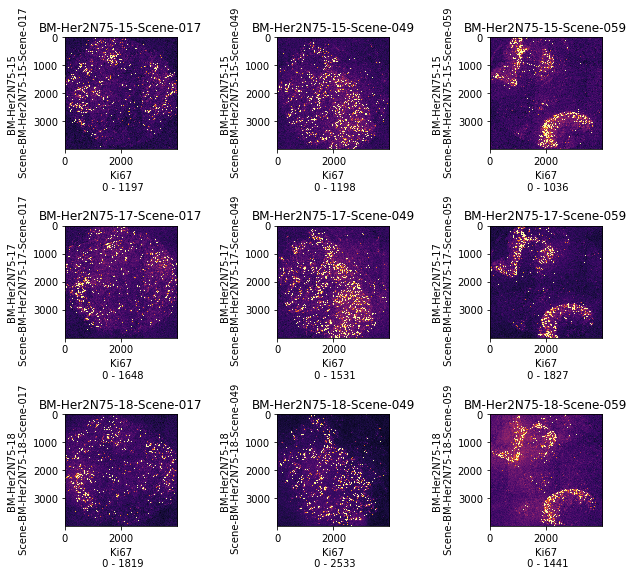

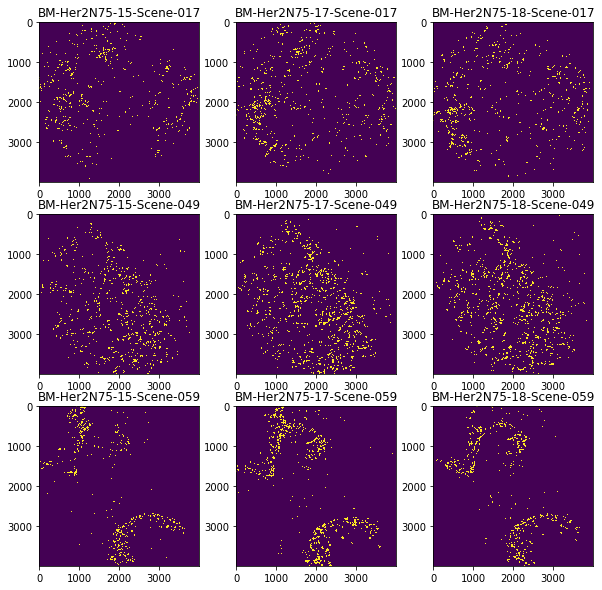

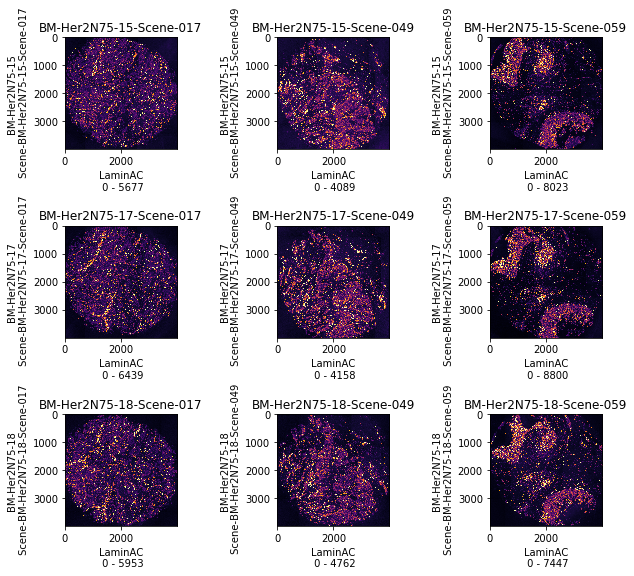

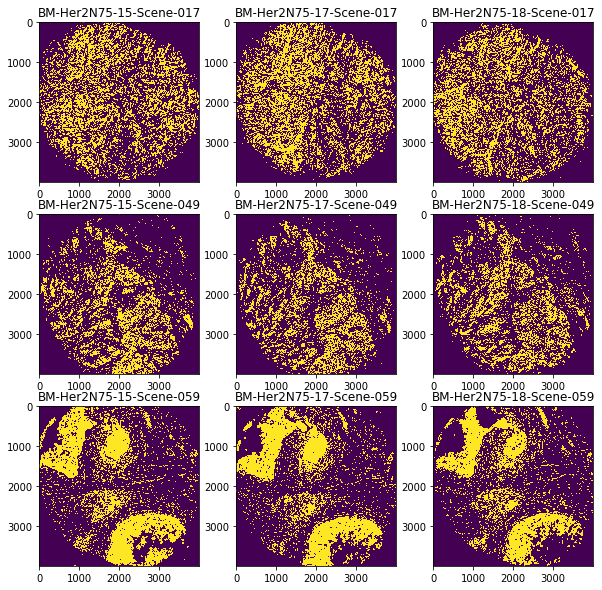

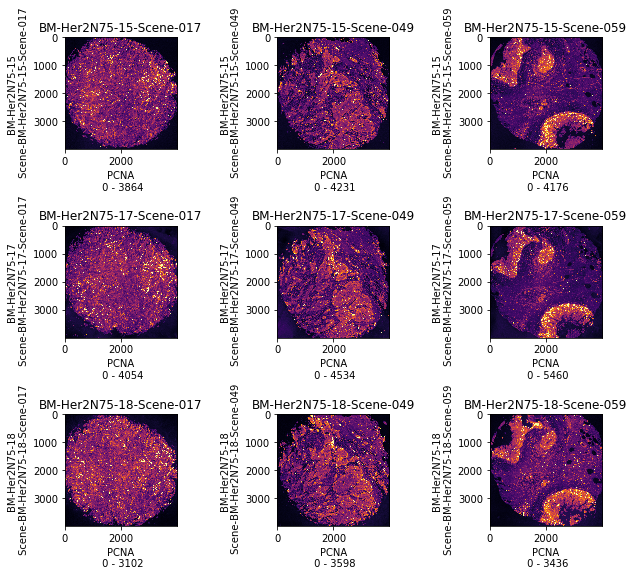

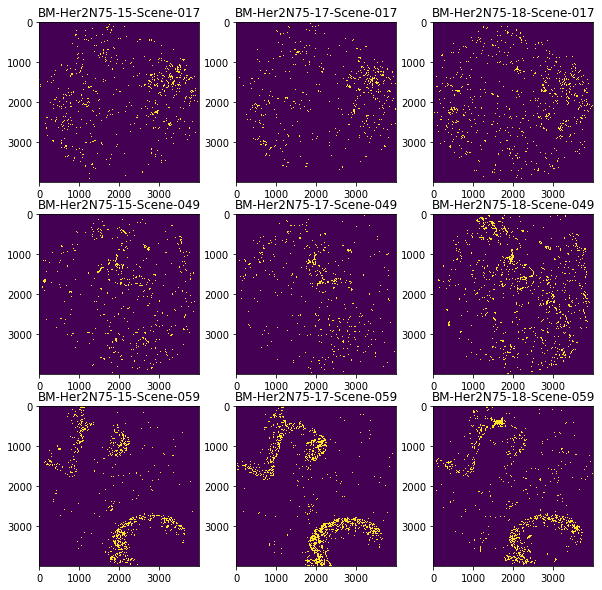

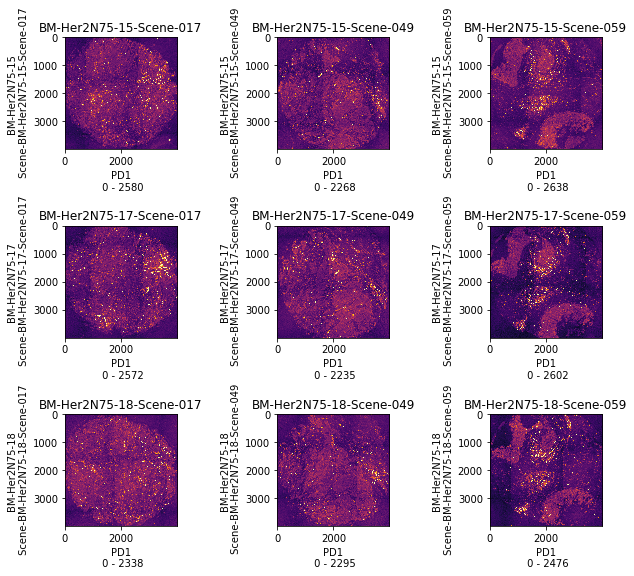

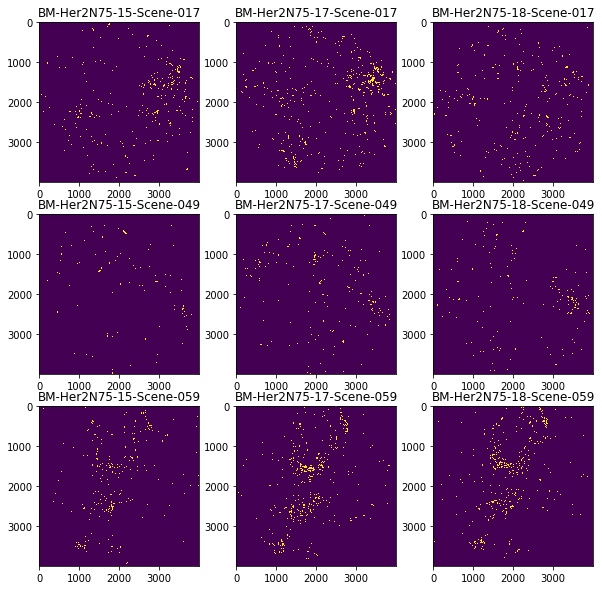

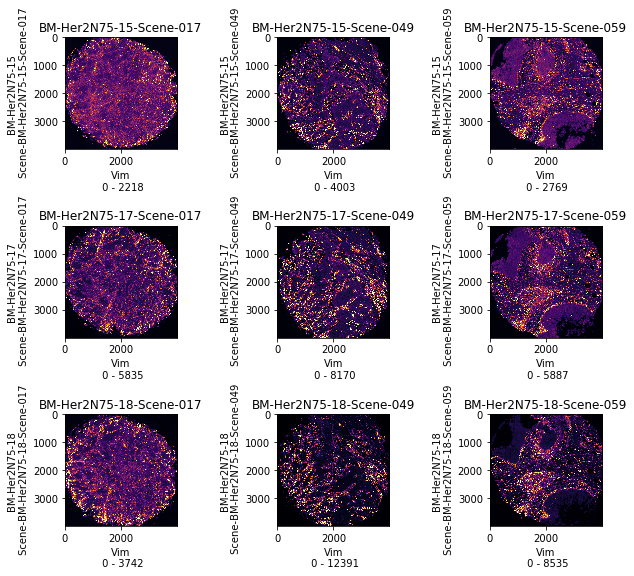

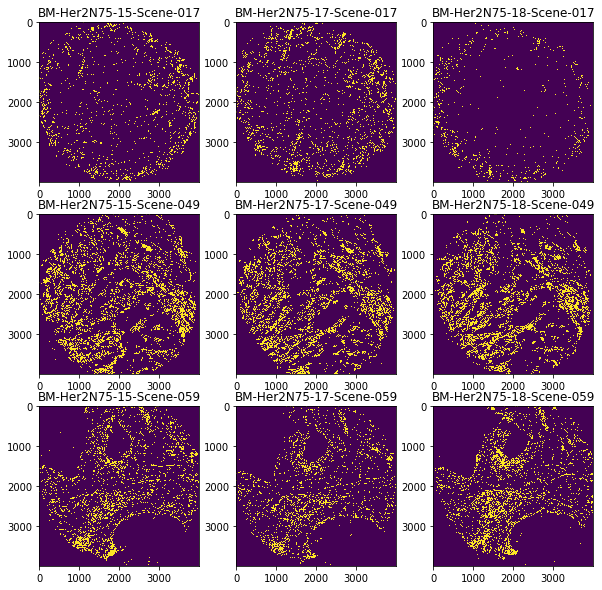

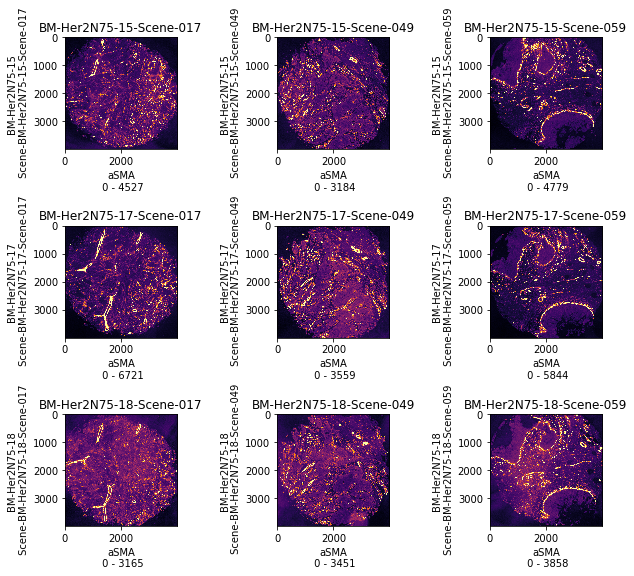

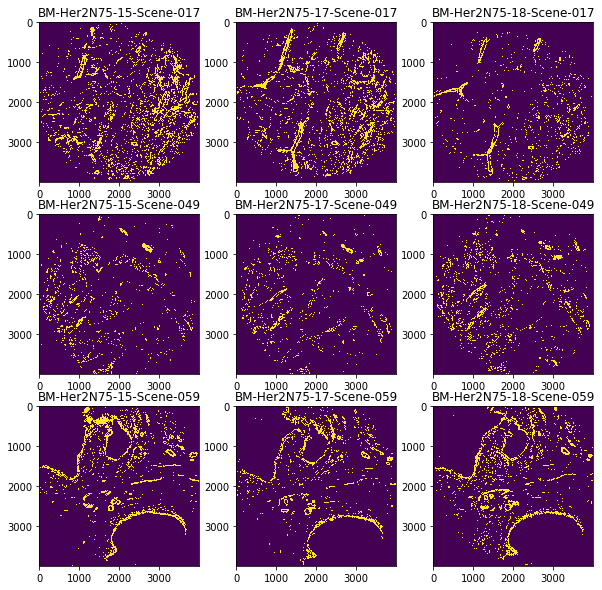

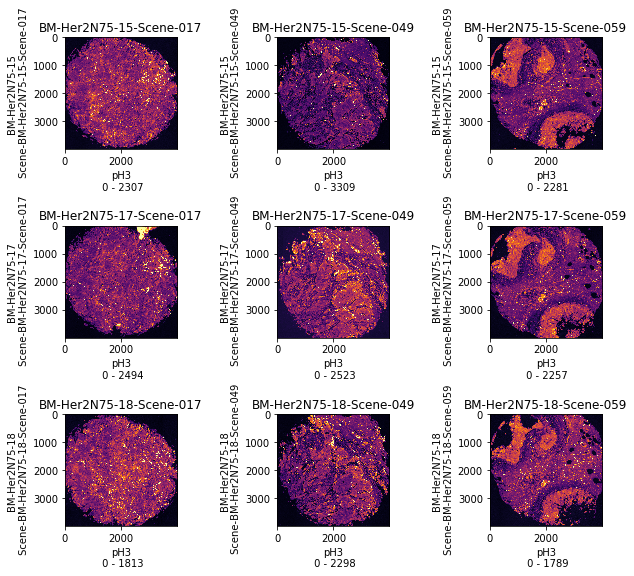

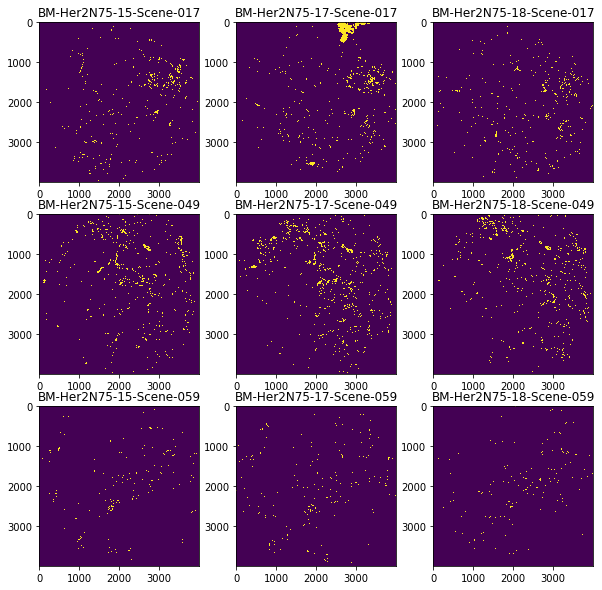

In [12]:
#load thresholds, rename some columns


df_thresh = pd.read_csv(f'{codedir}/Metadata/BM-Her2N75/SNR_jenny_replicates.csv',index_col=0)
df_thresh['scene_num'] = 'Scene-' + df_thresh.scene.astype('str')
df_thresh['scene'] = df_thresh.tissue
df_thresh['minimum'] = df_thresh.threshold
d_process = {
    'BM-Her2N75':f'{codedir}/Images/tiff',
 }
#results
df_result = pd.DataFrame()

for idx,(s_sample, s_path) in enumerate(d_process.items()):
    df_thresh.index = [item.split('/')[-1] for item in df_thresh.index]
    df_thresh['path'] = f'{s_path}/' + df_thresh.slide + '/' + df_thresh.index
    df_thresh.index = df_thresh.path
    
    for s_marker in sorted(set(df_thresh.marker)):
        
        df_marker = df_thresh[(df_thresh.marker==s_marker)]
        print(f'{s_marker}  {len(df_marker)}')
        #plot the images
        fig = mpimage.array_img(df_marker.sort_values(['scene_num','slide']),s_xlabel='marker',ls_ylabel=['slide','scene_num'],
            s_title='scene',tu_array=(3,len(df_marker)//3),tu_fig=(9,8),cmap='inferno',d_crop=d_crop)
        fig.savefig(f'{codedir}/Figures/{s_sample}/Replicate_TissueLoss_Background_{s_marker}.png')
        df_marker_thresh,d_mask = analyze.thresh_meanint(df_marker,d_crop)
        df_result =df_result.append(df_marker_thresh)
        #plot the mask
        fig, ax = plt.subplots(3,len(df_marker)//3,figsize=(10,10))
        ax=ax.ravel()
        for idx,(s_index, a_mask) in enumerate(d_mask.items()):
            ax[idx].imshow(a_mask)
            ax[idx].set_title(df_thresh.loc[s_index,'scene'])
        fig.savefig(f'{codedir}/Figures/{s_sample}/Replicate_Thresholding_{s_marker}.png')
